### 1.Setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#tf.logging.set_verbosity(tf.logging.ERROR) 

print("tf version: {}".format(tf.__version__))
tf.set_random_seed(1)
np.random.seed(1)

/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/pyt

tf version: 1.14.0


### 2. Get the data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)
data.test.cls = np.argmax(data.test.labels, axis=1) 

img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 3. Build the neural network 

#### 3.1 setup the neural network

In [3]:
input_x = tf.placeholder(tf.float32, [None, img_size_flat]) 
x_image = tf.reshape(input_x, [-1, img_size, img_size, num_channels]) 
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.argmax(y_true, dimension=1)

with tf.variable_scope("CNN_1_model"):
    net_a = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same', 
                           filters=16, kernel_size=5, activation=tf.nn.relu)
    net_a = tf.layers.max_pooling2d(inputs=net_a, pool_size=2, strides=2)
    
    net_a = tf.layers.conv2d(inputs=net_a, name='layer_conv2', padding='same', 
                           filters=36, kernel_size=5, activation=tf.nn.relu)
    net_a = tf.layers.max_pooling2d(inputs=net_a, pool_size=2, strides=2)

    net_a = tf.layers.flatten(net_a)
    net_a = tf.layers.dense(inputs=net_a, name='layer_fc1', units=128, activation=tf.nn.relu)
    logits_a = tf.layers.dense(inputs=net_a, name='layer_fc_out', units=num_classes, activation=None)
    y_pred_a = tf.nn.softmax(logits=logits_a)
    y_pred_cls_a = tf.argmax(y_pred_a, dimension=1)
    
    


    
with tf.variable_scope("CNN_2_model"):
    net_b = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same', 
                           filters=16, kernel_size=5, activation=tf.nn.relu)
    net_b = tf.layers.max_pooling2d(inputs=net_b, pool_size=2, strides=2)
    
    net_b = tf.layers.conv2d(inputs=net_b, name='layer_conv2', padding='same', 
                           filters=36, kernel_size=5, activation=tf.nn.relu)
    net_b = tf.layers.max_pooling2d(inputs=net_b, pool_size=2, strides=2)
    
    net_b = tf.layers.conv2d(inputs=net_b, name='layer_conv3', padding='same', 
                           filters=144, kernel_size=5, activation=tf.nn.relu)
    net_b = tf.layers.max_pooling2d(inputs=net_b, pool_size=2, strides=2)

    net_b = tf.layers.flatten(net_b)
    net_b = tf.layers.dense(inputs=net_b, name='layer_fc1', units=128, activation=tf.nn.relu)
    logits_b = tf.layers.dense(inputs=net_b, name='layer_fc_out', units=num_classes, activation=None)
    y_pred_b = tf.nn.softmax(logits=logits_b)
    y_pred_cls_b = tf.argmax(y_pred_b, dimension=1)
    
    
trainable_variable_a = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "CNN_1_model")
trainable_variable_b = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "CNN_2_model")

cross_entropy_a = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits_a)
cross_entropy_b = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits_b)
loss_a = tf.reduce_mean(cross_entropy_a)
loss_b = tf.reduce_mean(cross_entropy_b)
optimizer_a = tf.train.AdamOptimizer(learning_rate=1e-4)
optimizer_b = tf.train.AdamOptimizer(learning_rate=1e-4)
train_op_a = optimizer_a.minimize(loss_a, var_list= trainable_variable_a)
train_op_b = optimizer_b.minimize(loss_b, var_list= trainable_variable_b)


correct_prediction_a = tf.equal(y_pred_cls_a, y_true_cls)
correct_prediction_b = tf.equal(y_pred_cls_b, y_true_cls)
accuracy_a = tf.reduce_mean(tf.cast(correct_prediction_a, tf.float32))
accuracy_b = tf.reduce_mean(tf.cast(correct_prediction_b, tf.float32))






Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### 3.2 play with the parameters

In [4]:
def get_weights_variable(layer_name):
    
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')

    return variable


weights_conv1 = get_weights_variable(layer_name='CNN_2_model/layer_conv2')
print(weights_conv1)

<tf.Variable 'CNN_2_model/layer_conv2/kernel:0' shape=(5, 5, 16, 36) dtype=float32_ref>


In [5]:
def get_total_para_num(tf_variables):
    total_parameters = 0
    for variable in tf_variables:
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
    return total_parameters

print(get_total_para_num(trainable_variable_a))
print(get_total_para_num(trainable_variable_b))

242062
311902


#### 3.3 train the network

In [6]:
test_batch_size = 256

def print_test_accuracy(session):


    num_test = len(data.test.images)
    cls_pred_a = np.zeros(shape=num_test, dtype=np.int)
    cls_pred_b = np.zeros(shape=num_test, dtype=np.int)


    i = 0

    while i < num_test:

        j = min(i + test_batch_size, num_test)
        images = data.test.images[i:j, :]
        labels = data.test.labels[i:j, :]
        feed_dict = {input_x: images, y_true: labels}
        cls_pred_a[i:j], cls_pred_b[i:j] = session.run([y_pred_cls_a, y_pred_cls_b], feed_dict=feed_dict)
        i = j


    cls_true = data.test.cls

    
    correct_a = (cls_true == cls_pred_a)
    correct_b = (cls_true == cls_pred_b)
    correct_sum_a = correct_a.sum()
    correct_sum_b = correct_b.sum()
    acc_a = float(correct_sum_a) / num_test
    acc_b = float(correct_sum_b) / num_test


    msg_a = "Accuracy on Test-Set for model 1: {0:.1%} ({1} / {2})"
    msg_b = "Accuracy on Test-Set for model 2: {0:.1%} ({1} / {2})"
    #print(msg_a.format(acc_a, correct_sum_a, num_test))
    #print(msg_b.format(acc_b, correct_sum_a, num_test))
    
    return acc_a, acc_b

In [7]:
train_batch_size = 64


def train_cnn(num_iterations, session):
    global total_iterations
    global list_loss_a 
    global list_loss_b
    global list_acc_a 
    global list_acc_b 
    
    global list_acc_a_t 
    global list_acc_b_t 
    global list_iter

    for iteration in range(total_iterations, total_iterations + num_iterations):
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)
        feed_dict_train = {input_x: x_batch, y_true: y_true_batch}
        session.run([train_op_a, train_op_b], feed_dict = feed_dict_train)
        
        if iteration % 10 == 0:
            feed_dict_test = {input_x: data.test.images, y_true: data.test.labels}
            y_true_cls_batch = np.argmax(y_true_batch, axis=1) 
            l_a,l_b,a_a, a_b = session.run([loss_a, loss_b, accuracy_a, accuracy_b], feed_dict = feed_dict_train)
            a_a_t, a_b_t = print_test_accuracy(sess)
            
            list_loss_a.append(l_a)
            list_loss_b.append(l_b)
            list_acc_a.append(a_a)
            list_acc_b.append(a_b)
            list_acc_a_t.append(a_a_t)
            list_acc_b_t.append(a_b_t)
            list_iter.append(iteration)
            
    print("Finished the training from #{} to #{}".format(total_iterations, total_iterations + num_iterations-1))
    print("The accuracy is around model 1: {}, model 2: {}".format(a_a_t, a_b_t))
    total_iterations += num_iterations
    


In [8]:
total_iterations = 0
list_loss_a = []
list_loss_b = []
list_acc_a = []
list_acc_b = []
    
list_acc_a_t = []
list_acc_b_t = []
list_iter = []

sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [9]:
train_cnn(int(55000/train_batch_size*5), sess)

Finished the training from #0 to #4295
The accuracy is around model 1: 0.9822, model 2: 0.9849


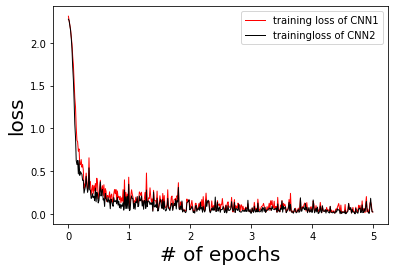

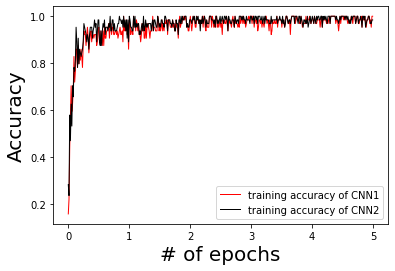

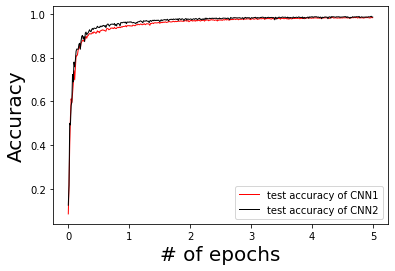

In [12]:
epoches = np.array(list_iter)/55000*64

plt.plot(epoches,list_loss_a, 'r-', lw=1, label = "training loss of CNN1")
plt.plot(epoches,list_loss_b, 'k-', lw=1, label = "trainingloss of CNN2")
plt.xlabel("# of epochs", fontsize = 20)
plt.ylabel("loss", fontsize = 20)
plt.legend()
plt.show()

plt.plot(epoches,list_acc_a, 'r-', lw=1, label = "training accuracy of CNN1")
plt.plot(epoches,list_acc_b, 'k-', lw=1, label = "training accuracy of CNN2")
plt.xlabel("# of epochs", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.legend()
plt.show()

plt.plot(epoches,list_acc_a_t, 'r-', lw=1, label = "test accuracy of CNN1")
plt.plot(epoches,list_acc_b_t, 'k-', lw=1, label = "test accuracy of CNN2")
plt.xlabel("# of epochs", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.legend()
plt.show()